<a href="https://colab.research.google.com/github/kyrahirasuna/IS4487/blob/main/Assgnmnt_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/adviseinvest (1).csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data

In [8]:
#Drop rows with N/A values
df_clean = df.dropna(axis = 0, how = 'any')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29502 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29502 non-null  int64  
 1   income          29502 non-null  int64  
 2   female          29502 non-null  int64  
 3   age             29502 non-null  int64  
 4   job             29502 non-null  int64  
 5   num_dependents  29502 non-null  int64  
 6   rent            29502 non-null  int64  
 7   own_res         29502 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29502 non-null  int64  
 10  sav_acct        29502 non-null  int64  
 11  num_accts       29502 non-null  int64  
 12  mobile          29502 non-null  int64  
 13  product         29502 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.4 MB


In [9]:
#Drop num_accts outlier
df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)
df_clean.describe()

<ipython-input-9-554472d38167>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['num_accts'] > 4].index, inplace = True)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000
mean,0.546592,33767.463137,0.054202,34.768415,1.915427,1.141012,0.210434,0.681096,0.240805,1.468391,0.956340,2.344870,0.091082,1.535711
std,0.497833,29380.583265,0.226419,11.354279,0.658194,0.348040,0.407623,0.466060,0.427580,1.234693,1.483763,1.200357,0.287730,1.625930
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [10]:
#Drop rows with negative income 
df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)
df_clean.describe()

<ipython-input-10-298eaf5c426e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(df_clean[df_clean['income'] < 0].index, inplace = True)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088,1.535747
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739,1.625958
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


## Change 'answered' 0/1 to yes/no

In [11]:
# Turn 'answered' column into categorical 
df_clean['answered'] = df_clean['answered'].astype('category')
df_clean.dtypes

<ipython-input-11-bd1391ca0174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['answered'] = df_clean['answered'].astype('category')


answered          category
income               int64
female               int64
age                  int64
job                  int64
num_dependents       int64
rent                 int64
own_res              int64
new_car            float64
chk_acct             int64
sav_acct             int64
num_accts            int64
mobile               int64
product              int64
dtype: object

In [12]:
# Using map function
df_clean['answered'] = df_clean['answered'].map({1:'yes', 0:'no'})
              
df_clean.head()

<ipython-input-12-aebd9b055c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['answered'] = df_clean['answered'].map({1:'yes', 0:'no'})


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,yes,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,no,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,yes,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,no,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,no,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


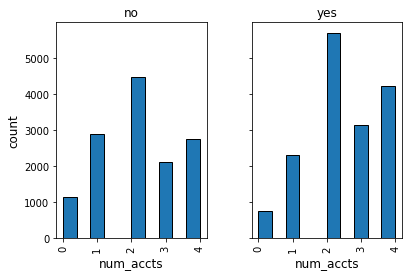

In [13]:
# 'answered' vs 'num_accts' 
graph1 = df_clean.hist('num_accts', by='answered', edgecolor='black', sharey = True)

for x in graph1:
    x.set_xlabel("num_accts", size = 12)
    x.set_ylabel('count', size =12) 

## Question 2: 

In [16]:
# convert 'mobile' into categorical variable 
df_clean['mobile'] = df_clean['mobile'].astype('category')
df_clean.dtypes

<ipython-input-16-03da75cad10d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mobile'] = df_clean['mobile'].astype('category')


answered          category
income               int64
female               int64
age                  int64
job                  int64
num_dependents       int64
rent                 int64
own_res              int64
new_car            float64
chk_acct             int64
sav_acct             int64
num_accts            int64
mobile            category
product              int64
dtype: object

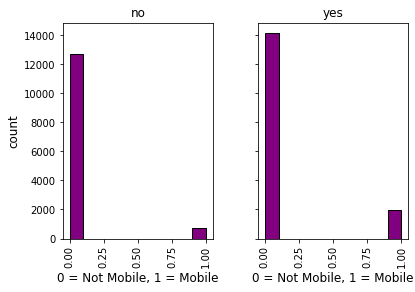

In [31]:
graph2 = df_clean.hist('mobile', by='answered', edgecolor='black', color = 'purple', sharey = True)

for x in graph2:
    x.set_xlabel("0 = Not Mobile, 1 = Mobile", size = 12)
    x.set_ylabel('count', size =12) 
    

<Axes: title={'center': 'Mobile Phone vs Calls Answered'}, xlabel='Mobile (1  = yes, 0 = no)', ylabel='Answered/Not Answered Count'>

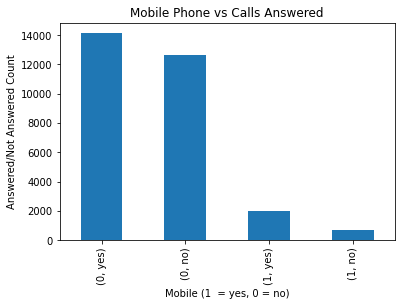

In [29]:
df_clean[['mobile','answered']].groupby('mobile').value_counts().plot.bar(xlabel='Mobile (1  = yes, 0 = no)', ylabel='Answered/Not Answered Count', title ='Mobile Phone vs Calls Answered')